In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

## Lee el archivo Isa.xlsx

In [45]:
db = pd.read_excel("Isa.xlsx")
db.head()

,Mes y año,Precio_Petroleo,Cambio_Petroleo,Precio_Oro,Cambio_Oro,Precio_Peso
0,2009-01-01,43.86,0.0610,858.69,0.0522,0.000442
1,2009-02-01,41.84,-0.0461,943.00,0.0982,0.000398
2,2009-03-01,46.65,0.1150,924.27,-0.0199,0.000405
3,2009-04-01,50.28,0.0778,890.20,-0.0369,0.000421
4,2009-05-01,58.15,0.1565,928.65,0.0432,0.000449


## Organiza los datos



In [47]:
X=db[db.columns[:-1]]
column_time= X[db.columns[0]][0].strftime("From_%Y/%m/%d")
X[db.columns[0]]=pd.to_datetime(X[db.columns[0]])-pd.to_datetime(X[db.columns[0]])[0]

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_22104/2220685524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[db.columns[0]]=pd.to_datetime(X[db.columns[0]])-pd.to_datetime(X[db.columns[0]])[0]


Timedelta('0 days 00:00:00')

Se cambia de timedelta a numero de días

In [71]:
for i in range(0,len(X[db.columns[0]])):
    X[db.columns[0]][i]=X[db.columns[0]][i].total_seconds()/(60*60*24)
X

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_22104/3409611945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[db.columns[0]][i]=X[db.columns[0]][i].total_seconds()/(60*60*24)


,Mes y año,Precio_Petroleo,Cambio_Petroleo,Precio_Oro,Cambio_Oro
0,0.0,43.86,0.0610,858.69,0.0522
1,31.0,41.84,-0.0461,943.00,0.0982
2,59.0,46.65,0.1150,924.27,-0.0199
3,90.0,50.28,0.0778,890.20,-0.0369
4,120.0,58.15,0.1565,928.65,0.0432
...,...,...,...,...,...
139,4230.0,43.44,0.0326,1968.63,0.0661
140,4261.0,40.60,-0.0654,1921.92,-0.0237
141,4291.0,39.90,-0.0172,1900.27,-0.0113
142,4322.0,42.30,0.0602,1866.30,-0.0179


In [72]:
y= db[db.columns[-1]]
display(X.head())
display(y.head())

,Mes y año,Precio_Petroleo,Cambio_Petroleo,Precio_Oro,Cambio_Oro
0,0.0,43.86,0.0610,858.69,0.0522
1,31.0,41.84,-0.0461,943.00,0.0982
2,59.0,46.65,0.1150,924.27,-0.0199
3,90.0,50.28,0.0778,890.20,-0.0369
4,120.0,58.15,0.1565,928.65,0.0432


0    0.000442
1    0.000398
2    0.000405
3    0.000421
4    0.000449
Name: Precio_Peso, dtype: float64

## Divide los datos en entrenamiento (70%) y prueba (30%)

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

## Implementa el modelo de regresión multilineal y da el $R^2$

In [74]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)

print(f"R^2 sobre datos de entrenamiento: {model.score(X_train, y_train)}")
print(f"R^2 sobre datos de prueba: {model.score(X_test, y_test)}")

R^2 sobre datos de entrenamiento: 0.968377261192552
R^2 sobre datos de prueba: 0.9585983065046925


## Intercepto encontrado

In [75]:
model.intercept_

0.00032454604992457206

## Pendientes encontradas

In [76]:
model.coef_

array([-4.96134562e-08,  2.23951291e-06, -4.65929756e-05,  3.36220161e-08,
       -6.62015759e-05])

## Predicción sobre valores de X_test

Puede importar una tabla que se llame X_test para predecir más resultados (Consultar al docente para más información)

In [77]:
model.predict(X_test)

array([0.00049791, 0.00034424, 0.00050669, 0.00050743, 0.00056913,
       0.00031864, 0.00054693, 0.00052452, 0.00054896, 0.00034181,
       0.00057711, 0.00053591, 0.00031933, 0.00026507, 0.00033036,
       0.00026598, 0.000223  , 0.00038618, 0.00051497, 0.00056953,
       0.00040212, 0.00034876, 0.00038722, 0.00034657, 0.00026645,
       0.0005139 , 0.00052374, 0.0005223 , 0.00046989, 0.00049412,
       0.00052504, 0.00033571, 0.00035348, 0.00056231, 0.00046143,
       0.00056099, 0.00032596, 0.00050819, 0.00035866, 0.00033153,
       0.00050457, 0.00052856, 0.00033008, 0.0003622 ])

## Importancia de cada variable dependiente

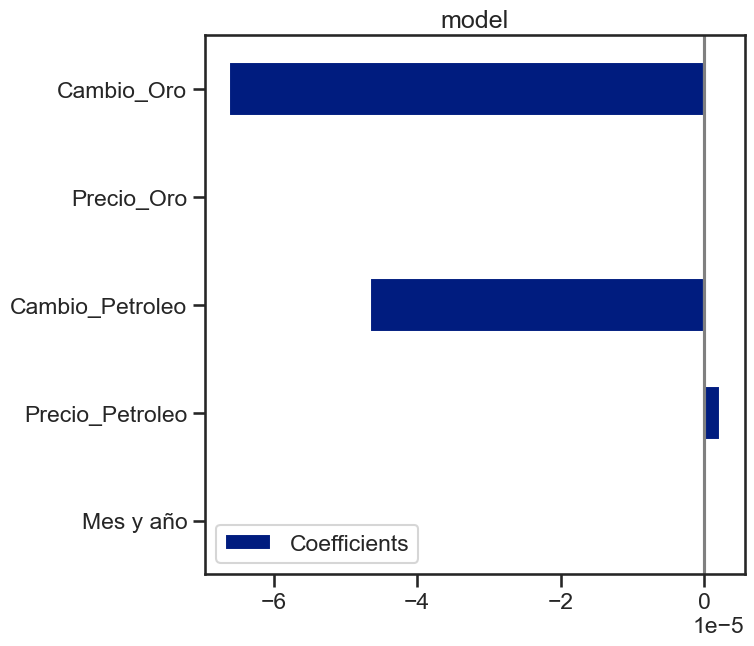

In [112]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
    model.coef_, columns=["Coefficients"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
plt.savefig("Caracteristicas.jpg")

## Grafica predichas vs reales

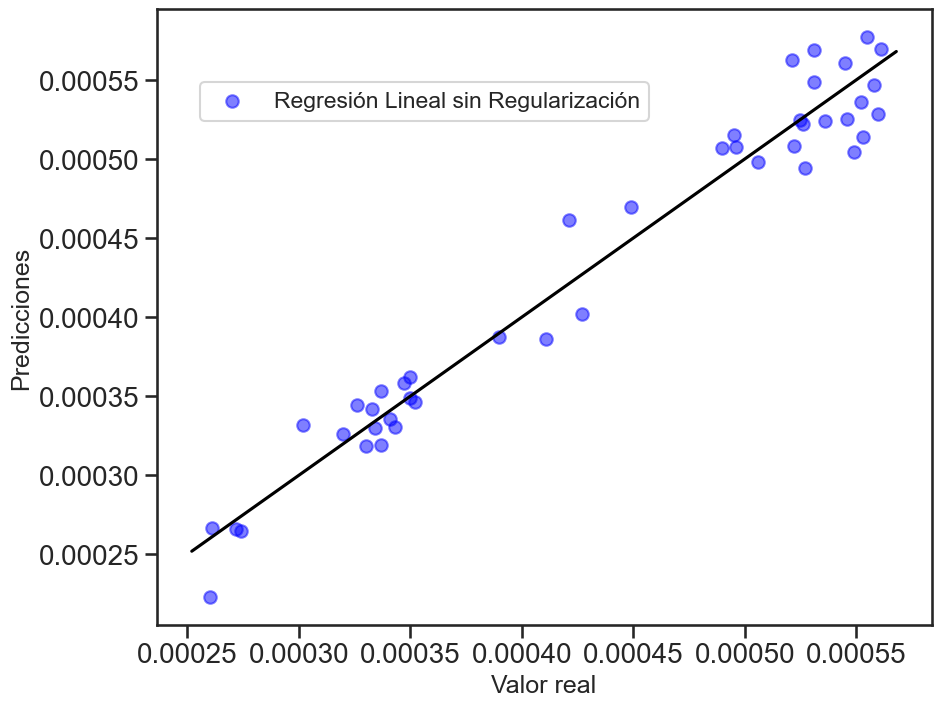

In [111]:
import seaborn as sns
import numpy as np
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.scatter(y_test, model.predict(X_test), alpha=.5, c='b', label=('Regresión Lineal sin Regularización'))
linea = np.linspace(y.min(),y.max())
ax.tick_params(labelsize = 20)

ax.plot(linea,linea,"k")
ax.set(xlabel='Valor real', 
       ylabel='Predicciones');
ax.legend(bbox_to_anchor=[0.65, 0.9])
plt.savefig("Prediccion.jpg")